<a href="https://colab.research.google.com/github/Vishal35198/Waste-Classification/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
import numpy as np

In [3]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 38.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [4]:
import easyocr

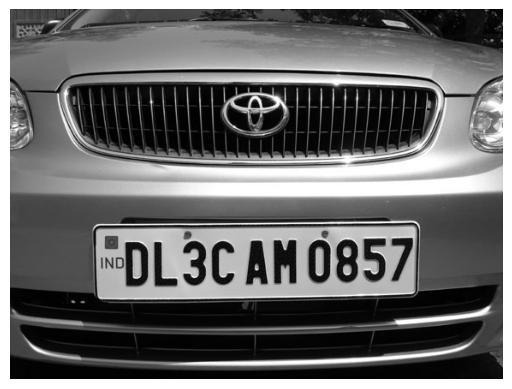

In [6]:
img = cv.imread('/content/drive/MyDrive/ANPR/car.jpeg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))

In [7]:
def show_img(img):
    new_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(new_img)

# Apply Filters

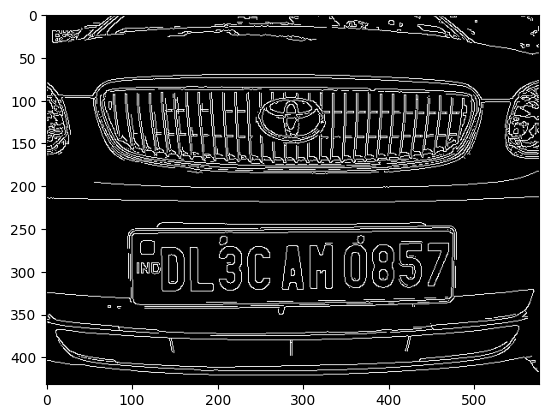

In [8]:
bfilter = cv.bilateralFilter(gray,11,17,17)
edged = cv.Canny(bfilter,30,200)
# plt.axis('off')
plt.imshow(cv.cvtColor(edged,cv.COLOR_BGR2RGB))

In [9]:
import numpy as np

In [10]:
keypoints = cv.findContours(edged.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv.contourArea,reverse = True)[:10]

In [11]:
for i in range(len(contours)):
    print(len(contours[i]))

55
53
180
299
30
22
36
32
52
46


In [12]:
location = None
for contour in contours:
    approx = cv.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
    break

In [13]:
location

array([[[475, 256]],

       [[102, 256]],

       [[101, 332]],

       [[471, 332]]], dtype=int32)

In [14]:
mask = np.zeros(gray.shape,np.uint8)
new_img = cv.drawContours(mask,[location],0,255,-1)
new_img = cv.bitwise_and(img,img,mask = mask)

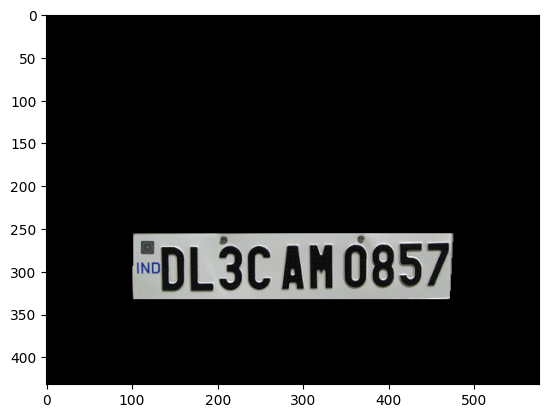

In [15]:
plt.imshow(cv.cvtColor(new_img,cv.COLOR_BGR2RGB))

In [16]:
(x,y) = np.where(mask == 255) # get only the black part of the mask
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_img = gray[x1:x2+1,y1:y2+1]

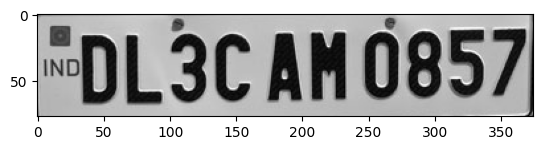

In [17]:
show_img(cropped_img)

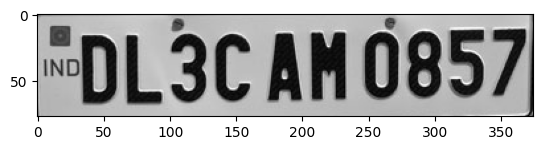

In [18]:
plt.imshow(cv.cvtColor(cropped_img,cv.COLOR_BGR2RGB))
plt.savefig('cropped_img.png')

In [19]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img, paragraph=True)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


[[[[0, 0], [375, 0], [375, 76], [0, 76]], '"DL3C AM 0857']]

In [20]:
text = result[0][1]

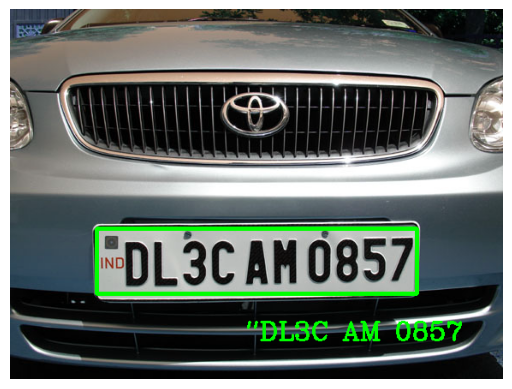

In [22]:

font = cv.FONT_HERSHEY_COMPLEX
res = cv.putText(img, text, (approx[0][0][0]-200, approx[1][0][1]+130), font, 1, (0, 255, 0), 2)
res = cv.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(res)
plt.axis('off')
plt.savefig('result.png')